## Adv. Data Analytics Homework 2: Chapter 3 (Linear Regression)
### Jake Bova

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from ISLP import load_data

### 1

Describe the null hypotheses to which the p-values given in Table 3.4
correspond. Explain what conclusions you can draw based on these
p-values. Your explanation should be phrased in terms of sales, TV,
radio, and newspaper, rather than in terms of the coefficients of the
linear model.

|-------------| Coefficient | Std. error | t-statistic | p-value  |
|-------------|-------------|------------|-------------|----------|
|Intercept|2.939| 0.3119      | 9.42        | < 0.0001 |
|TV| 0.046| 0.0014   | 32.81       | < 0.0001 |
|radio| 0.189 | 0.0086      | 21.89       | < 0.0001 |
|newspaper|-0.001| 0.0059     | -0.18       | 0.8599   |

The null hypothesis for the p-values in Table 3.4 is that the coefficient for each of the advertising mediums (TV, radio, and newspaper) is equal to zero. The p-values are all less than 0.05 except for the newspaper coefficient, which is 0.8599. This means that we can reject the null hypothesis for TV and radio, but we cannot reject the null hypothesis for newspaper. This means that TV and radio advertising have a significant effect on sales, but newspaper advertising does not.

### 3

Suppose we have a data set with five predictors, $X_{1}$ = GPA, $X_{2}$ =
IQ, $X_{3}$ = Level (1 for College and 0 for High School), $X_{4}$ = Interaction between GPA and IQ, and $X_{5}$ = Interaction between GPA and Level. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get 
<!-- latex center -->
$$
\hat{\beta}_{0} = 50, \hat{\beta}_{1} = 20, \hat{\beta}_{2} = 0.07, \hat{\beta}_{3} = 35, \hat{\beta}_{4} = 0.01, \hat{\beta}_{5} = -10.
$$

3a. Which answer is correct, and why?

i. For a fixed value of IQ and GPA, high school graduates earn
more, on average, than college graduates.

ii. For a fixed value of IQ and GPA, college graduates earn
more, on average, than high school graduates.

iii. For a fixed value of IQ and GPA, high school graduates earn
more, on average, than college graduates provided that the
GPA is high enough.

iv. For a fixed value of IQ and GPA, college graduates earn
more, on average, than high school graduates provided that
the GPA is high enough.

The correct answer is (ii). This is because the coefficient for the Level variable is 35, which means that college graduates earn more, on average, than high school graduates.  The interaction term between GPA and Level is -10, which means that the effect of GPA on salary is less for college graduates than for high school graduates.

3b. Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.

The predicted salary is given by
<!-- latex center -->
$$
\hat{\beta}_{0} + \hat{\beta}_{1}X_{1} + \hat{\beta}_{2}X_{2} + \hat{\beta}_{3}X_{3} + \hat{\beta}_{4}X_{4} + \hat{\beta}_{5}X_{5}
$$

Substituting in the given values, we get
<!-- latex center -->
$$
50 + 20(4.0) + 0.07(110) + 35 + 0.01(4.0)(110) - 10(4.0 * 1) = 137.1
$$

The predicted salary is 137.1 thousand dollars.

3c. True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

False. The coefficient for the GPA/IQ interaction term is 0.01, which is technically a small number.  However, this still means that there is evidence of an interaction effect between GPA and IQ. If we had the p-value for this coefficient, we could use that to determine if the interaction effect is significant.

### 9

This question involves the use of multiple linear regression on the
Auto data set.

In [2]:
autodata = pd.read_csv('data/Auto.csv')
# fix horsepower to numeric
autodata['horsepower'] = pd.to_numeric(autodata['horsepower'], errors='coerce')
autodata = autodata.dropna()

9a. Produce a scatterplot matrix which includes all of the variables
in the data set.

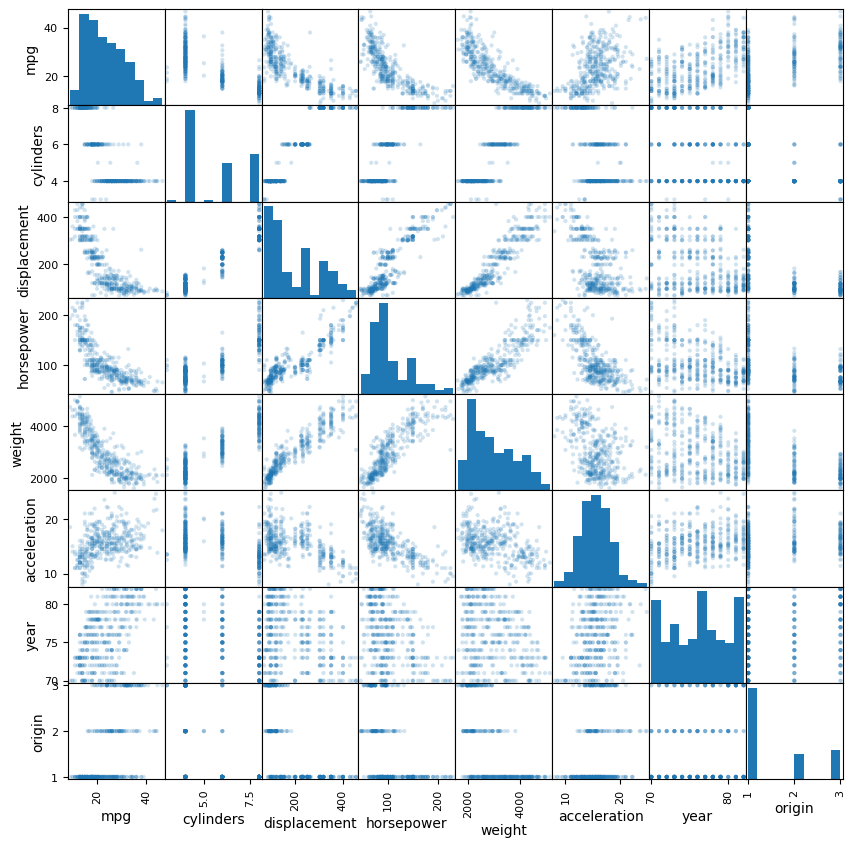

In [33]:
pd.plotting.scatter_matrix(autodata, alpha=0.2, figsize=(10, 10));

9b. Compute the matrix of correlations between the variables using
the DataFrame.corr() method.

In [4]:
autodata.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


9c. Use the sm.OLS() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summarize() function to print the results.
Comment on the output. For instance:

i. Is there a relationship between the predictors and the re-
sponse? Use the anova_lm() function from statsmodels to
answer this question.

ii. Which predictors appear to have a statistically significant
relationship to the response?

iii. What does the coefficient for the year variable suggest?

In [5]:
autodata.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [6]:
autodata.columns[1:-1]

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [7]:
X = MS(autodata.columns[1:-1]).fit_transform(autodata)
y = autodata['mpg']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


9d. Produce some of diagnostic plots of the linear regression fit as
described in the lab. Comment on any problems you see with the
fit. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?

Text(0, 0.5, 'Residuals')

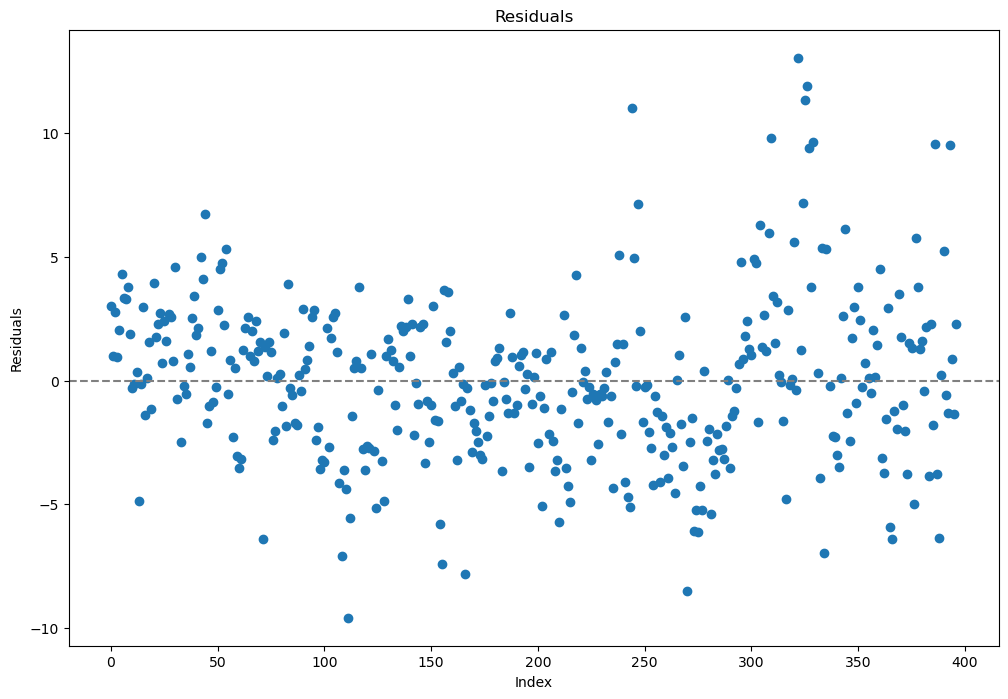

In [8]:
results.resid.plot(style='o', figsize=(12, 8))
# hline
plt.axhline(0, color='gray', linestyle='--')
# title
plt.title('Residuals')
# xlabel
plt.xlabel('Index')
# ylabel
plt.ylabel('Residuals')

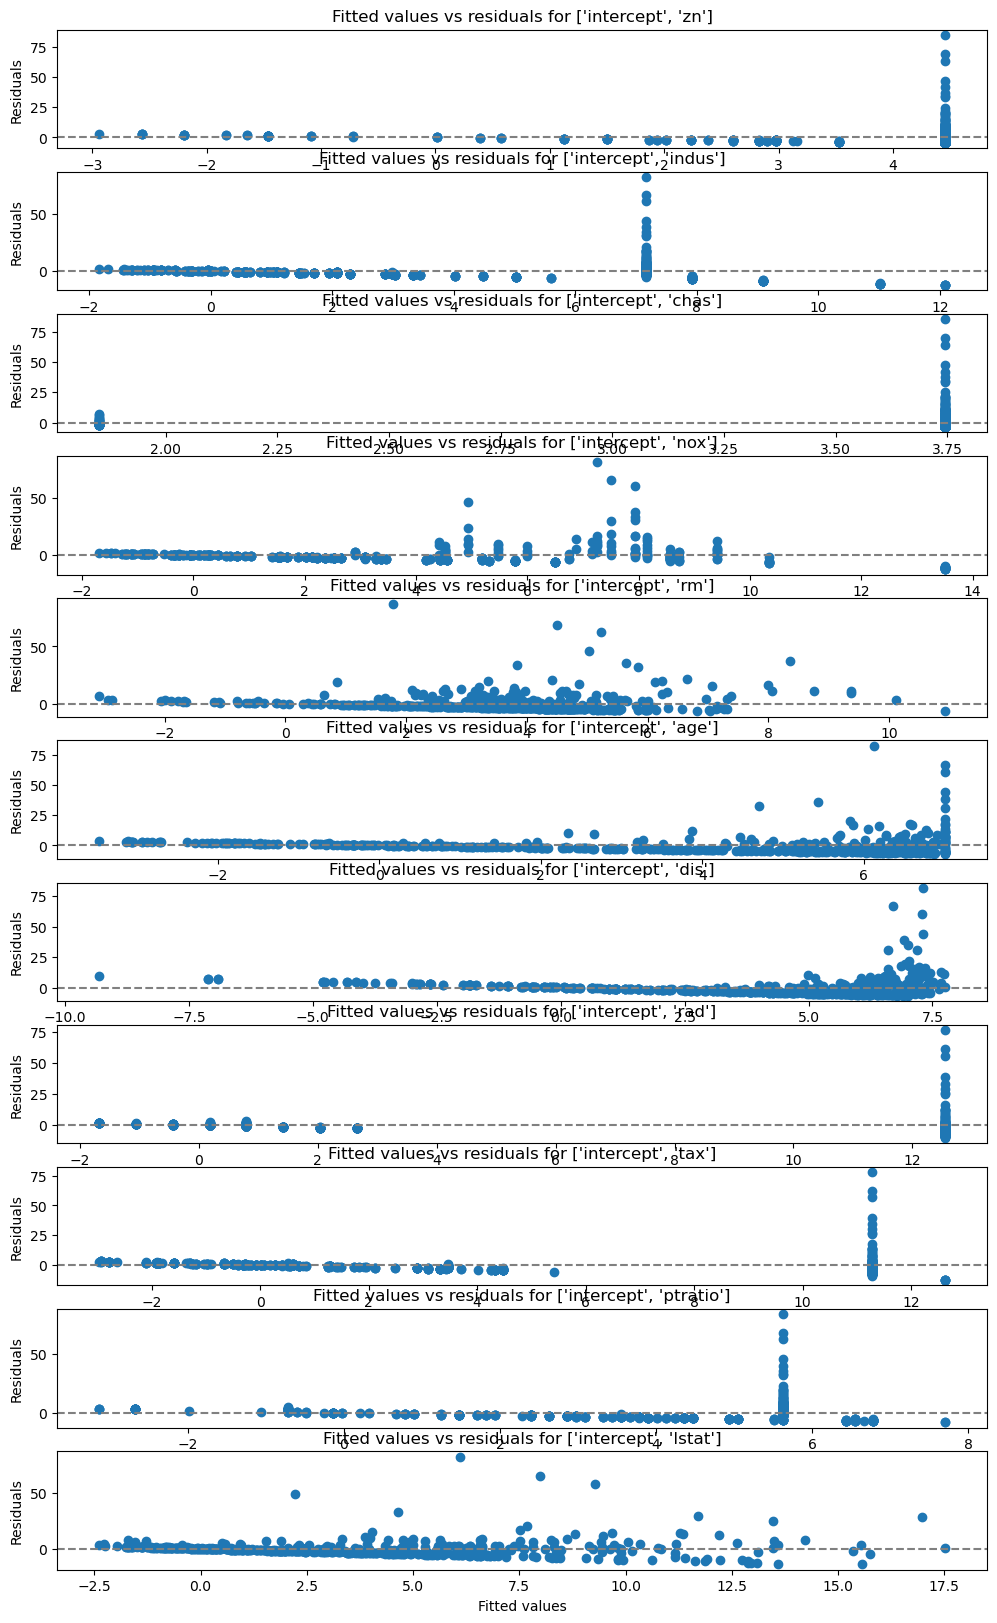

In [55]:
# plot fitted values for each in results (multiple)
num = len(results) -1
fig, ax = plt.subplots(num, 1, figsize=(12, 20))
for i in range(num):
    ax[i].plot(results[i].fittedvalues, results[i].resid, 'o')
    ax[i].axhline(0, color='gray', linestyle='--')
    ax[i].set_title(f'Fitted values vs residuals for {results[i].model.exog_names}')
    ax[i].set_xlabel('Fitted values')
    ax[i].set_ylabel('Residuals')

In the Residual vs Fitted Values plot above, larger fitted values have higher residuals.  This could indicate that the relationship between the predictors and the response is not linear.

13

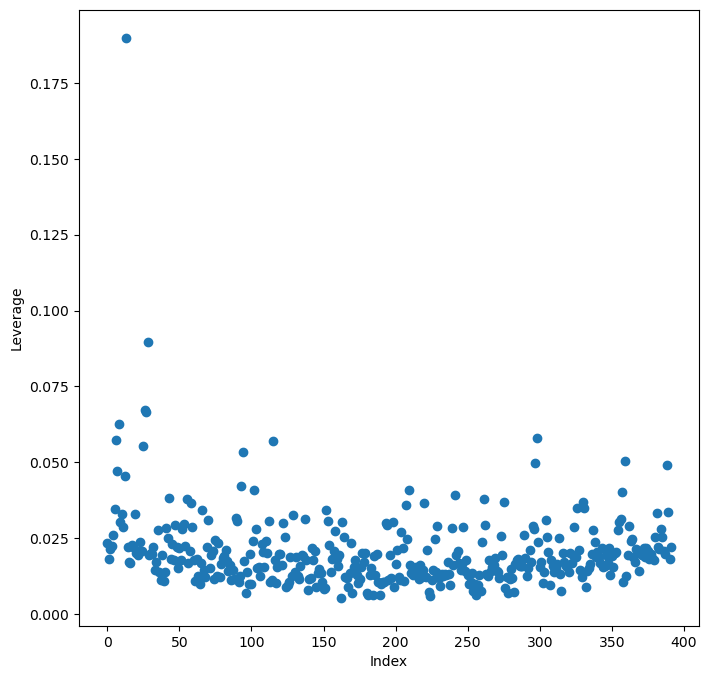

In [9]:
infl = results.get_influence() # get the influence object, which contains a number of diagnostic measures
ax = plt.subplots(figsize=(8,8))[1] # create a new figure, and get the axis
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag) # draw a scatter plot of the leverage values. The leverage is a measure of how much an observation influences its own fit
ax.set_xlabel('Index') # set the x-axis label
ax.set_ylabel('Leverage') # set the y-axis label
np.argmax(infl.hat_matrix_diag) # find the index of the observation with the highest leverage

# The leverage plot below can tell us if there are any observations that are exerting a disproportionate influence on the fit.# 
# The index will tell us which observation has the highest leverage.

In [10]:
autodata.iloc[np.argmax(infl.hat_matrix_diag)]

mpg                                14.0
cylinders                             8
displacement                      455.0
horsepower                        225.0
weight                             3086
acceleration                       10.0
year                                 70
origin                                1
name            buick estate wagon (sw)
Name: 13, dtype: object

In [11]:
vals = [VIF(X, i) # list comprehension to calculate the VIF for each predictor, this is like a for loop but more compact
        for i in range(1, X.shape[1])] # loop over the columns of the predictor matrix, skipping the intercept (which is the first column, index 0)
vif = pd.DataFrame({'vif':vals}, # create a data frame with the VIF values
                   index=X.columns[1:])
vif

,vif
cylinders,10.737535
displacement,21.836792
horsepower,9.943693
weight,10.831260
acceleration,2.625806
year,1.244952
origin,1.772386


9e. Fit some models with interactions as described in the lab. Do
any interactions appear to be statistically significant?

In [12]:
autodata = pd.read_csv('data/Auto.csv')
# fix horsepower to numeric
autodata['horsepower'] = pd.to_numeric(autodata['horsepower'], errors='coerce')
autodata = autodata.dropna()

In [13]:
# horsepower x weight interaction
autodata['horsepower_x_weight'] = autodata['horsepower'] * autodata['weight']
# cylinders x displacement interaction
autodata['cylinders_x_displacement'] = autodata['cylinders'] * autodata['displacement']
X = MS(autodata.columns.drop(['mpg', 'name'])).fit_transform(autodata)
y = autodata['mpg']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,4.052800,4.544000,0.892,0.373
cylinders,-0.735700,0.483000,-1.522,0.129
displacement,-0.020100,0.016000,-1.269,0.205
horsepower,-0.208000,0.027000,-7.754,0.000
weight,-0.010100,0.001000,-10.849,0.000
acceleration,-0.070600,0.089000,-0.793,0.428
year,0.769200,0.045000,17.168,0.000
origin,0.715900,0.259000,2.765,0.006
horsepower_x_weight,0.000047,0.000007,6.781,0.000
cylinders_x_displacement,0.003900,0.002000,1.816,0.070


In [14]:
X = autodata.drop(columns=['mpg', 'name'])

# find best interaction terms
interactions = []
for i in range(X.shape[1]):  
    for j in range(i+1, X.shape[1]): 
        interactions.append((X.columns[i], X.columns[j]))

# X = MS(autodata.columns.drop(['mpg', 'name'])).fit_transform(autodata)

best_interaction = None
best_vif = 0
for interaction in interactions:
    X = MS(autodata.columns.drop(['mpg', 'name'])).fit_transform(autodata)
    X[interaction[0] + '_x_' + interaction[1]] = autodata[interaction[0]] * autodata[interaction[1]]
    vals = [VIF(X, i) for i in range(1, X.shape[1])]
    vif = pd.DataFrame({'vif':vals}, index=X.columns[1:])
    if vif.max()[0] > best_vif:
        best_vif = vif.max()[0]
        best_interaction = interaction

best_interaction

('cylinders', 'cylinders_x_displacement')

9f. Try a few different transformations of the variables, such as 
<!-- latex logx -->
$$
\log(X), \sqrt{X}, X^{2}.
$$
Comment on your findings.

In [15]:
autodata = pd.read_csv('data/Auto.csv')
# fix horsepower to numeric
autodata['horsepower'] = pd.to_numeric(autodata['horsepower'], errors='coerce')
autodata = autodata.dropna()

In [16]:
def log(x):
    return np.log(x)

def sqrt(x):
    return np.sqrt(x)

def polyterm(x, n):
    return x**n

autodata_log = autodata.copy()
autodata_sqrt = autodata.copy()
autodata_2 = autodata.copy()

# create a new data frame with the transformed variables
for col in autodata.columns.drop(['mpg', 'name']):
    autodata_log[col + '_log'] = log(autodata[col])
    autodata_sqrt[col + '_sqrt'] = sqrt(autodata[col])
    autodata_2[col + '_2'] = polyterm(autodata[col], 2)

# drop all the original variables from the transformed data frames
autodata_log = autodata_log.drop(columns=autodata.columns.drop(['mpg', 'name']))
autodata_sqrt = autodata_sqrt.drop(columns=autodata.columns.drop(['mpg', 'name']))
autodata_2 = autodata_2.drop(columns=autodata.columns.drop(['mpg', 'name']))

# fit the models
X = MS(autodata.columns.drop(['mpg', 'name'])).fit_transform(autodata)
X_log = MS(autodata_log.columns.drop(['mpg', 'name'])).fit_transform(autodata_log)
X_sqrt = MS(autodata_sqrt.columns.drop(['mpg', 'name'])).fit_transform(autodata_sqrt)
X_2 = MS(autodata_2.columns.drop(['mpg', 'name'])).fit_transform(autodata_2)
y = autodata['mpg']
model_normal = sm.OLS(y, X)
model_log = sm.OLS(y, X_log)
model_sqrt = sm.OLS(y, X_sqrt)
model_2 = sm.OLS(y, X_2)
results_normal = model_normal.fit()
results_log = model_log.fit()
results_sqrt = model_sqrt.fit()
results_2 = model_2.fit()
summarize(results_normal), summarize(results_log), summarize(results_sqrt), summarize(results_2)

(                 coef  std err       t  P>|t|
 intercept    -17.2184    4.644  -3.707  0.000
 cylinders     -0.4934    0.323  -1.526  0.128
 displacement   0.0199    0.008   2.647  0.008
 horsepower    -0.0170    0.014  -1.230  0.220
 weight        -0.0065    0.001  -9.929  0.000
 acceleration   0.0806    0.099   0.815  0.415
 year           0.7508    0.051  14.729  0.000
 origin         1.4261    0.278   5.127  0.000,
                      coef  std err       t  P>|t|
 intercept        -66.5643   17.505  -3.803  0.000
 cylinders_log      1.4818    1.659   0.893  0.372
 displacement_log  -1.0551    1.538  -0.686  0.493
 horsepower_log    -6.9657    1.557  -4.474  0.000
 weight_log       -12.5728    2.225  -5.650  0.000
 acceleration_log  -4.9831    1.608  -3.099  0.002
 year_log          54.9857    3.555  15.465  0.000
 origin_log         1.5822    0.508   3.113  0.002,
                       coef  std err       t  P>|t|
 intercept         -49.7981    9.178  -5.426  0.000
 cylinders_s

In [17]:
# r2 values
results_normal.rsquared, results_log.rsquared, results_sqrt.rsquared, results_2.rsquared

(0.8214780764810597, 0.8481977307095117, 0.833848379191787, 0.7980685272523484)

The R^2 values above show that the squared transformation of the variables had the highest impact, with sqrt and log having smaller impacts.  This indicates that the relationship between the predictors and the response is not linear, and that a squared transformation of the predictors may be a better fit.

### 10

This question should be answered using the Carseats data set.

In [18]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [19]:
# change Urban and US Yes/No to 1/0
Carseats['Urban'] = (Carseats['Urban'] == 'Yes').astype(int)
Carseats['US'] = (Carseats['US'] == 'Yes').astype(int)

10a. Fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [20]:
# mls to predict sales using price, urban, US
X = MS(['Price', 'Urban', 'US']).fit_transform(Carseats)
y = Carseats['Sales']
model = sm.OLS(y, X)
results_a = model.fit()
summarize(results_a)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban,-0.0219,0.272,-0.081,0.936
US,1.2006,0.259,4.635,0.000


10b. Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

- The price coef of -0.0545 means that for every dollar increase in price, sales decrease by 0.0545 units.  The Urban coef -0.0219 means that sales are 0.0219 units lower in urban areas than in rural areas.  However, the p-value for this coef is 0.93, so it is not statistically significant.  The US coef 1.2006 means that sales are 1.2006 units higher in the US than in non-US countries.

10c. Write out the model in equation form, being careful to handle
the qualitative variables properly.

<!-- latex model for the coefs and vars above -->
$$
\text{Sales} = 13.0435 - 0.0545\text{Price} - 0.0219\text{Urban} + 1.2006\text{US}
$$


10d. For which of the predictors can you reject the null hypothesis
H0 : βj = 0?

- We can reject the null hypothesis for the Price and US predictors, but not for the Urban predictor.

10e. On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

In [21]:
# mls to predict sales using price, urban, US
X = MS(['Price', 'US']).fit_transform(Carseats)
y = Carseats['Sales']
model = sm.OLS(y, X)
results_e = model.fit()
summarize(results_e)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US,1.1996,0.258,4.641,0.0


10f. How well do the models in (a) and (e) fit the data?

In [22]:
# goodness of fit
anova_lm(results_a, results_e)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,396.0,2420.834671,0.0,NaN,NaN,NaN
1,397.0,2420.874462,-1.0,-0.03979,0.006525,NaN


In [23]:
# r2 values
results_a.rsquared, results_e.rsquared

(0.23927539218405547, 0.23926288842678567)

From the anova table and r2 values above, we can see that model (a) fits slightly better to the data, even though it has an extra predictor.  Even though the Urban predictor was statistically insignificant, it still had a small impact on the r2 value and residuals.

10g. Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).

In [24]:
# model e 95% CI
results_e.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


10h. Is there evidence of outliers or high leverage observations in the
model from 10e?

42

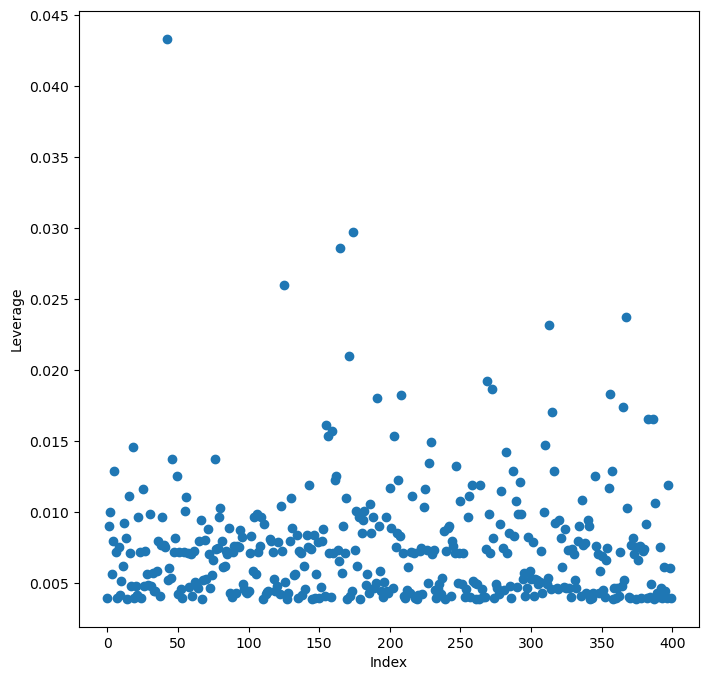

In [25]:
# leverage plot
infl = results_e.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

Text(0, 0.5, 'Residuals')

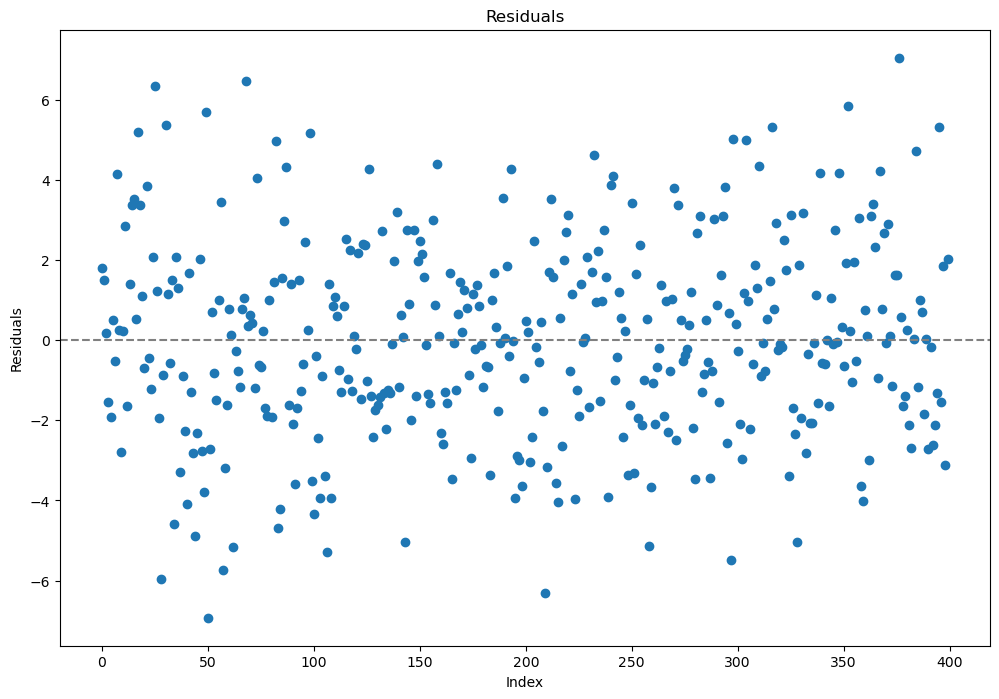

In [26]:
# residuals plot
results_e.resid.plot(style='o', figsize=(12, 8))
# hline
plt.axhline(0, color='gray', linestyle='--')
# title
plt.title('Residuals')
# xlabel
plt.xlabel('Index')
# ylabel
plt.ylabel('Residuals')

It appears there is a high leverage observation at index 42, with some slightly less high leverage observations throughout.  THe residual plot shows that the model really does not fit the data well, with a lot of residuals being far from the 0 line.  This indicates that there are outliers in the data.

### 15 (extra credit)

This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

In [27]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

A data set containing housing values in 506 suburbs of Boston.

crim: per capita crime rate by town.

zn: proportion of residential land zoned for lots over 25,000 sq.ft.

indus: proportion of non-retail business acres per town.

chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox: nitrogen oxides concentration (parts per 10 million).

rm: average number of rooms per dwelling.

age: proportion of owner-occupied units built prior to 1940.

dis: weighted mean of distances to five Boston employment centres.

rad: index of accessibility to radial highways.

tax: full-value property-tax rate per $10,000.

ptratio: pupil-teacher ratio by town.

lstat: lower status of the population (percent).

medv: median value of owner-occupied homes in $1000s.

15a. For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.

In [28]:
# fit a new model to each predictor
results = []
for col in Boston.columns.drop('crim'):
    X = MS([col]).fit_transform(Boston)
    y = Boston['crim']
    model = sm.OLS(y, X)
    results.append(model.fit())

# print the results
for i, col in enumerate(Boston.columns.drop('crim')):
    print(col)
    print(summarize(results[i]))

zn
             coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0
indus
             coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000
chas
             coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209
nox
              coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0
rm
              coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0
age
             coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0
dis
             coef  std err       t  P>|t|
intercept  9.4993    0.730  13.006    0.0
dis       -1.5509    0.168  -9.213    0.0
rad
             coef  std err       t  P>|t|
intercept -2.2872    0.443  -5.157    0.0
rad    

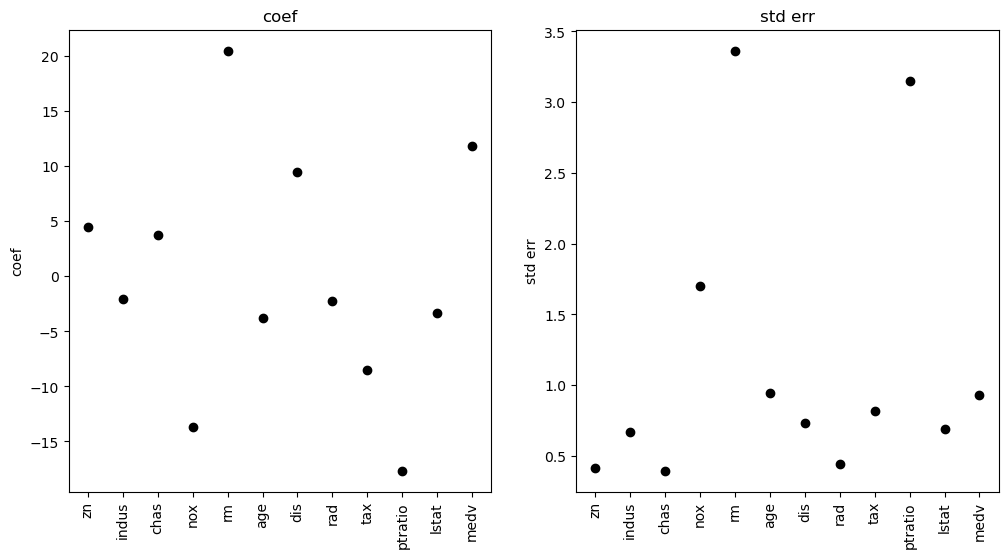

In [29]:
# plot std errors for each predictor, next to coef for each predictor (2 plots)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i, col in enumerate(Boston.columns.drop('crim')):
    ax[0].scatter(i, results[i].params[0], color='black')
    ax[0].set_xticks(np.arange(len(Boston.columns.drop('crim'))))
    ax[0].set_xticklabels(Boston.columns.drop('crim'), rotation=90)
    ax[0].set_ylabel('coef')
    ax[0].set_title('coef')
    ax[1].scatter(i, results[i].bse[0], color='black')
    ax[1].set_xticks(np.arange(len(Boston.columns.drop('crim'))))
    ax[1].set_xticklabels(Boston.columns.drop('crim'), rotation=90)
    ax[1].set_ylabel('std err')
    ax[1].set_title('std err')

- All p-values with the exception of Chas (Charles River dummy variable) are less than 0.05, which means that all predictors except Chas have a statistically significant association with the response.

- The coef and std err plots above reveal more info about the relations in this dataset.  The coefs that are farther from 0 have a stronger relationship with the response.  Predictors with lower std err are more reliable in the sense that they are less likely to be affected by random noise.

15b. Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis $H_{0}$ : $\beta_{j}$ = 0?

In [30]:
# model with all predictors
X = MS(Boston.columns.drop('crim')).fit_transform(Boston)
y = Boston['crim']
model = sm.OLS(y, X)
results_all = model.fit()
summarize(results_all)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


- The results above show that we can reject the null hypothesis for all predictors except indus, chas, rm, age, tax, and ptratio.  Nox and lstat with a value of 0.06 / 0.67 is close enough to 0.05 that we could consider rejecting the null hypothesis for them as well.

- The results indicate that the predictors with the strongest relationship to the response are zn, dis, rad, and medv.

15c. How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regres-
sion model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.

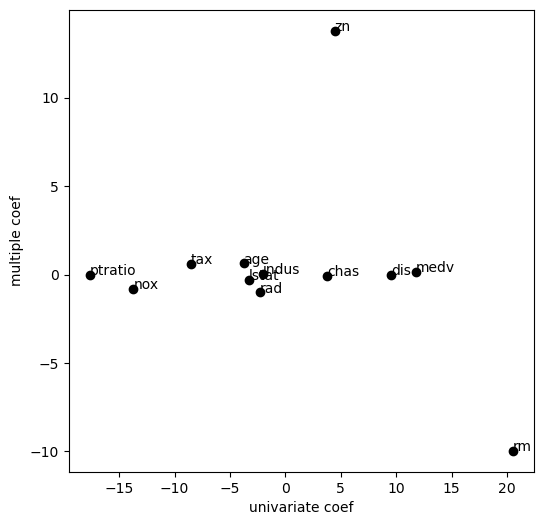

In [31]:
# plot
fig, ax = plt.subplots(figsize=(6, 6))
for i, col in enumerate(Boston.columns.drop('crim')):
    ax.scatter(results[i].params[0], results_all.params[i], color='black')
    ax.text(results[i].params[0], results_all.params[i], col)
    ax.set_xlabel('univariate coef')
    ax.set_ylabel('multiple coef')

- The plot above shows that the multi regression coefs are closer to 0 than the univariate coefs.  This is because the multi regression coefs take into account the effect of all other predictors on the response, while the univariate coefs do not.

- It is also interesting to observe the rm predictor, which has a strong positive relationship with the response in the univariate model, but a negative relationship in the multi regression model.  This is likely due to the effect of other predictors on the response.

15d. Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
<!-- latex -->
$$
Y = \beta_{0} + \beta_{1}X + \beta_{2}X^{2} + \beta_{3}X^{3} + \epsilon.
$$